In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

Задаём размер выборки и генерируем всевозможные значения параметра $\theta$ (задаём сетку).

In [2]:
n = 10 ** 3
thetas = np.arange(0, 1.01, 0.01)
len(thetas)

101

Воспользуемся результатом одной из задач, разобранных нами на семинаре. Мы знаем вклад выборки X из распределения Бернулли:$u_\theta (X) = \frac{n}{\theta (1 - \theta)} (\bar{X} - \theta)$. Далее из неравенства Рао-Крамера найдём нижнюю оценку дисперсии произвольной несмещенной оценки:  $D_{\theta}\theta^{*} \ge \frac{(\tau'(\theta))^2}{ni(\theta)}$. Следовательно, $D_{\theta}\theta^{*} \ge \frac{\theta (1 - \theta)}{n}$. Запишем эту оценку в lower_est. Также заметим, что $\bar{X}$ - эффективная оценка $\theta$.

In [3]:
lower_est = np.zeros(len(thetas))
for i in range(len(thetas)):
    lower_est[i] = thetas[i] * (1. - thetas[i]) / float(n)

Теперь строим график нижней оценки в неравенстве Рао-Крамера:

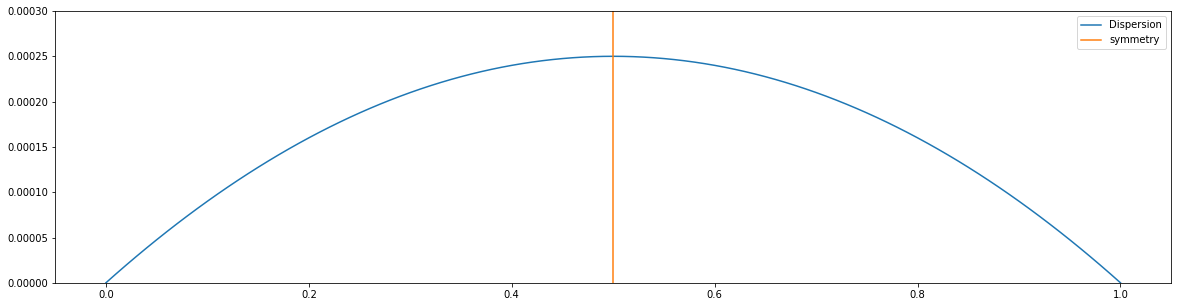

In [6]:
plt.figure(figsize = (20, 5))
plt.plot(thetas, lower_est, label = 'Dispersion')
plt.plot([0.5] * 1000, np.linspace(0, 0.1, 1000), label = 'symmetry')
plt.legend()
plt.ylim(0, 0.0003)
plt.show()

Таким образом, мы можем сделать вывод о том, что график нижней оценки в неравенстве Рао-Крамера для распределения Бернулли симметричен относительно прямой x = 0.5.

Для каждого значения $\theta$ из той же сетки сгенерируем выборку размера n.

In [7]:
samples = [sps.bernoulli.rvs(theta, size = n) for theta in thetas]

Теперь задаём эффективную оценку, равную $\bar{X}$.

In [8]:
effective_eval = np.zeros(len(samples))
for i in range(len(samples)):
    effective_eval[i] = np.mean(samples[i])

Теперь посчитаем бутстрепную оценку дисперсии эффективной оценки $\theta$. Для начала сгенерируем бутстрепные выборки в количестве 500.

In [9]:
bootstrap_number = 500
bootstrap_samples = []
for i in range(len(thetas)) :
    bootstrap_samples.append([sps.bernoulli.rvs(thetas[i] , size = n) for j in range(bootstrap_number)])

Найдём выборочное среднее для наших бутстрепных оценок.

In [10]:
bootstrap_mean = []
for i in range(len(thetas)) :
    bootstrap_mean.append([np.mean(bootstrap_samples[i][j]) for j in range(bootstrap_number)])

Теперь мы можем посчитать то, что нам нужно (бустрепную оценку дисперсии эффективной оценки $\theta$).

In [11]:
bootstrap_std = [sps.moment(bootstrap_mean[i], 2) for i in range(len(thetas))]

Теперь строим графики нижней и бутстрепной оценок:

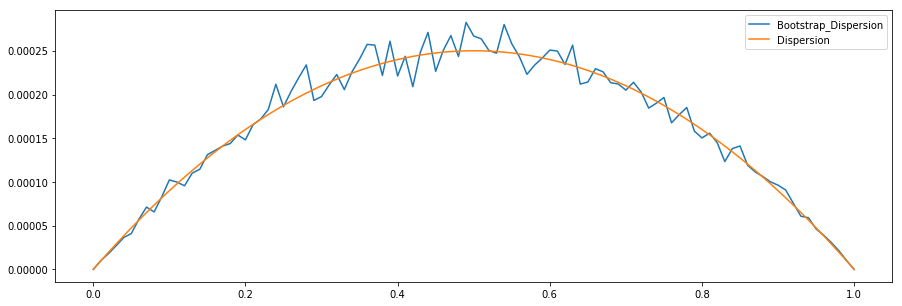

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(thetas, bootstrap_std, label = 'Bootstrap_Dispersion')
plt.plot(thetas, lower_est, label = 'Dispersion')
plt.legend()
plt.show()